## Love Compatibility Prediction 

### Preprocessing the data

pandas is used to read the dataset into a table (DataFrame).

The dataset is stored in df, which now holds all the data.

In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [5]:
# Load dataset
df = pd.read_csv("love_compatibility_dataset.csv")


In [63]:
df.head()

,Age,Introversion_Score,Emotional_Stability_Score,Common_Interests_Score,Compatibility_Category,Gender_Female,Gender_Male,Gender_Non-binary,Love_Language_Acts of Service,Love_Language_Physical Touch,Love_Language_Quality Time,Love_Language_Receiving Gifts,Love_Language_Words of Affirmation,Communication_Style_Balanced,Communication_Style_Direct,Communication_Style_Indirect
0,0.926829,0.7,0.1,0.9,1,True,False,False,False,False,True,False,False,True,False,False
1,0.682927,0.1,0.7,1.0,1,False,True,False,False,False,True,False,False,False,False,True
2,0.341463,0.0,0.6,0.8,0,True,False,False,False,False,False,False,True,True,False,False
3,0.170732,0.1,0.0,0.4,0,True,False,False,False,False,False,True,False,False,True,False
4,0.487805,0.0,0.4,0.3,0,False,True,False,True,False,False,False,False,False,False,True


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 500 non-null    float64
 1   Introversion_Score                  500 non-null    float64
 2   Emotional_Stability_Score           500 non-null    float64
 3   Common_Interests_Score              500 non-null    float64
 4   Compatibility_Category              500 non-null    int64  
 5   Gender_Female                       500 non-null    bool   
 6   Gender_Male                         500 non-null    bool   
 7   Gender_Non-binary                   500 non-null    bool   
 8   Love_Language_Acts of Service       500 non-null    bool   
 9   Love_Language_Physical Touch        500 non-null    bool   
 10  Love_Language_Quality Time          500 non-null    bool   
 11  Love_Language_Receiving Gifts       500 non-n

Convert Compatibility Score into Categories
Right now, the dataset has a numerical column called "Compatibility_Score", which is a number between 0 and 100.
Since SVM works best with classification tasks, we convert it into three categories:
The function pd.cut() splits Compatibility_Score into three groups:

0 ---Low Compatibility (Score: 0-40)

1 ---Medium Compatibility (Score: 41-70)

2 ---High Compatibility (Score: 71-100)

This means instead of predicting an exact score, the model will classify relationships into Low, Medium, or High compatibility.

In [7]:
# Convert Compatibility Score into categories
df["Compatibility_Category"] = pd.cut(
    df["Compatibility_Score"], bins=[-1, 40, 70, 100], labels=[0, 1, 2]
)

Now that we have a categorical target column (Compatibility_Category), we delete the original Compatibility_Score column.

This prevents the model from accidentally using it in training.

In [9]:
# Drop original Compatibility_Score
df.drop(columns=["Compatibility_Score"], inplace=True)

In [11]:
# One-hot encoding categorical features
df = pd.get_dummies(df, columns=["Gender", "Love_Language", "Communication_Style"])

Some columns have big differences in scale:

Age (18-60)

Introversion Score (0-10)

Emotional Stability Score (0-10)

Common Interests Score (0-10)

If we don't scale them, SVM may give more importance to Age just because it has larger values
MinMaxScaler() scales all values between 0 and 1.

In [13]:
# Normalize numerical features
scaler = MinMaxScaler()
numerical_features = ["Age", "Introversion_Score", "Emotional_Stability_Score", "Common_Interests_Score"]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
# Save preprocessed dataset
df.to_csv("love_compatibility_preprocessed.csv", index=False)

### writing code to implement Support Vector Classification (SVC) to predict love compatibility


1 . Importing libraries
Sklearn:

train_test_split – Splits data into training and testing sets.

GridSearchCV – Tunes hyperparameters.

SVC – Implements Support Vector Machine (SVM) for classification.

accuracy_score, classification_report, confusion_matrix – Evaluate model performance.

Matplotlib & Seaborn: Visualizations (confusion matrix, feature importance).

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:

# Load the preprocessed dataset
data = pd.read_csv('love_compatibility_preprocessed.csv')

# Separate features and target
X = data.drop('Compatibility_Category', axis=1)
y = data['Compatibility_Category']

In [35]:
# Split data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Feature Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Function to evaluate and plot results
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Low Compat', 'High Compat'], 
                yticklabels=['Low Compat', 'High Compat'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()
    
    return accuracy


=== Linear Kernel ===
Accuracy: 0.9700

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        78
           1       0.91      0.95      0.93        22

    accuracy                           0.97       100
   macro avg       0.95      0.96      0.96       100
weighted avg       0.97      0.97      0.97       100



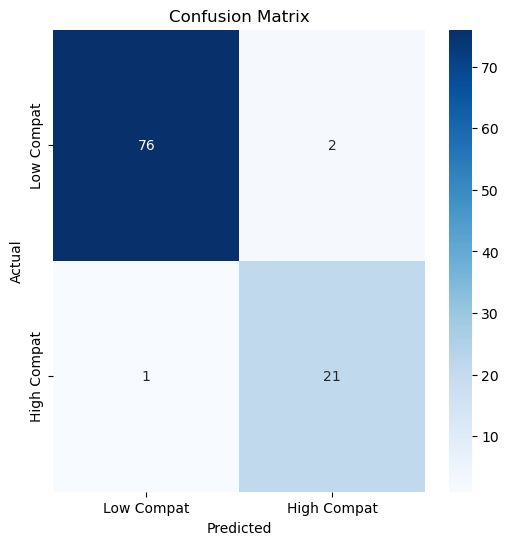


=== Polynomial Kernel ===
Accuracy: 0.8800

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        78
           1       0.69      0.82      0.75        22

    accuracy                           0.88       100
   macro avg       0.82      0.86      0.84       100
weighted avg       0.89      0.88      0.88       100



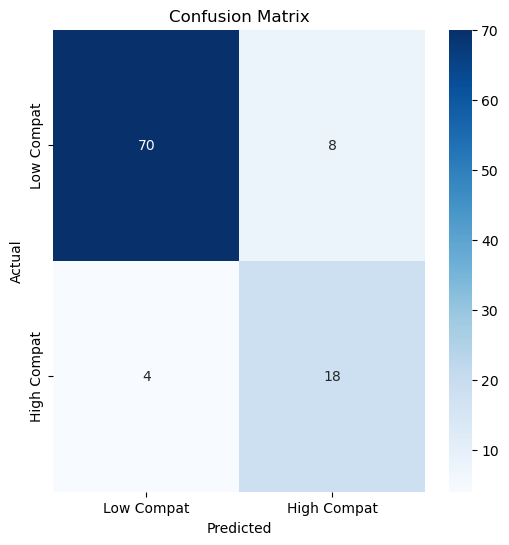


=== RBF Kernel ===
Accuracy: 0.8800

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        78
           1       0.67      0.91      0.77        22

    accuracy                           0.88       100
   macro avg       0.82      0.89      0.84       100
weighted avg       0.90      0.88      0.89       100



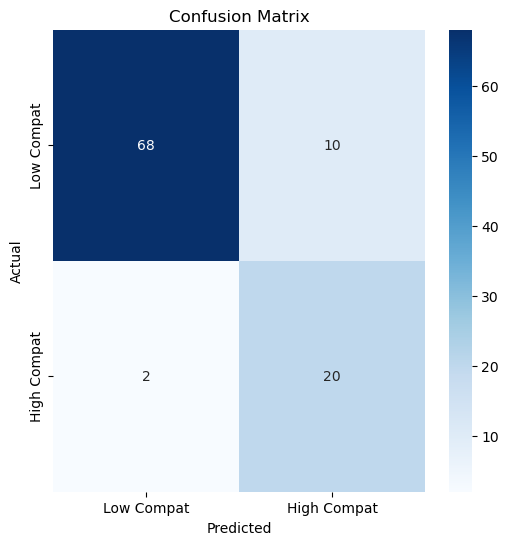


=== Sigmoid Kernel ===
Accuracy: 0.9400

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        78
           1       0.83      0.91      0.87        22

    accuracy                           0.94       100
   macro avg       0.90      0.93      0.92       100
weighted avg       0.94      0.94      0.94       100



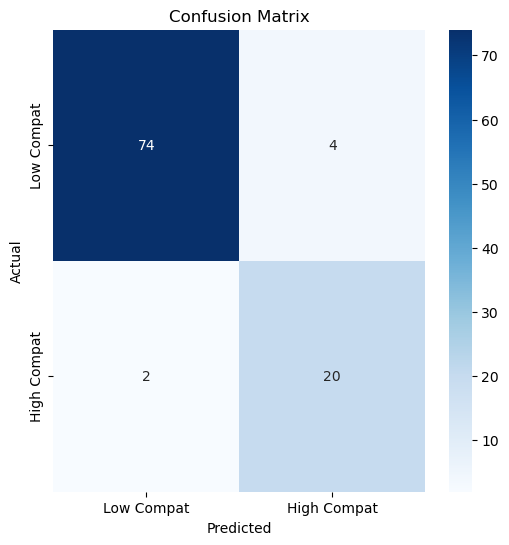

In [41]:
# 1. Linear Kernel
print("\n=== Linear Kernel ===")
linear_svc = SVC(kernel='linear', random_state=42)
linear_svc.fit(X_train_scaled, y_train)
linear_acc = evaluate_model(linear_svc, X_test_scaled, y_test)

# 2. Polynomial Kernel
print("\n=== Polynomial Kernel ===")
poly_svc = SVC(kernel='poly', degree=3, random_state=42)
poly_svc.fit(X_train_scaled, y_train)
poly_acc = evaluate_model(poly_svc, X_test_scaled, y_test)

# 3. RBF Kernel
print("\n=== RBF Kernel ===")
rbf_svc = SVC(kernel='rbf', random_state=42)
rbf_svc.fit(X_train_scaled, y_train)
rbf_acc = evaluate_model(rbf_svc, X_test_scaled, y_test)

# 4. Sigmoid Kernel
print("\n=== Sigmoid Kernel ===")
sigmoid_svc = SVC(kernel='sigmoid', random_state=42)
sigmoid_svc.fit(X_train_scaled, y_train)
sigmoid_acc = evaluate_model(sigmoid_svc, X_test_scaled, y_test)


=== Hyperparameter Tuning for RBF Kernel ===
Best parameters found:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.8800

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        78
           1       0.67      0.91      0.77        22

    accuracy                           0.88       100
   macro avg       0.82      0.89      0.84       100
weighted avg       0.90      0.88      0.89       100



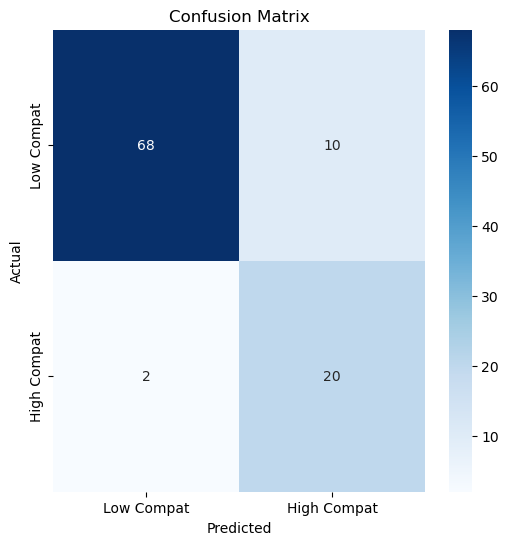

In [42]:
# Hyperparameter Tuning for Best Kernel (RBF typically performs best)
print("\n=== Hyperparameter Tuning for RBF Kernel ===")
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search.best_params_)
best_svc = grid_search.best_estimator_
best_acc = evaluate_model(best_svc, X_test_scaled, y_test)

In [43]:
# Compare all models
results = pd.DataFrame({
    'Kernel': ['Linear', 'Polynomial', 'RBF', 'Sigmoid', 'Tuned RBF'],
    'Accuracy': [linear_acc, poly_acc, rbf_acc, sigmoid_acc, best_acc]
})

print("\n=== Model Comparison ===")
print(results.sort_values('Accuracy', ascending=False))



=== Model Comparison ===
       Kernel  Accuracy
0      Linear      0.97
3     Sigmoid      0.94
1  Polynomial      0.88
2         RBF      0.88
4   Tuned RBF      0.88



=== Feature Importance (Linear Kernel) ===
                               Feature  Importance
3               Common_Interests_Score    2.524252
2            Emotional_Stability_Score    1.768668
1                   Introversion_Score    1.462121
6                    Gender_Non-binary    0.186118
5                          Gender_Male    0.120151
0                                  Age    0.113994
13          Communication_Style_Direct    0.105021
11  Love_Language_Words of Affirmation    0.092626
12        Communication_Style_Balanced    0.056737
9           Love_Language_Quality Time    0.049835
8         Love_Language_Physical Touch    0.049231
14        Communication_Style_Indirect    0.044750
10       Love_Language_Receiving Gifts    0.017218
7        Love_Language_Acts of Service    0.017030
4                        Gender_Female    0.009645


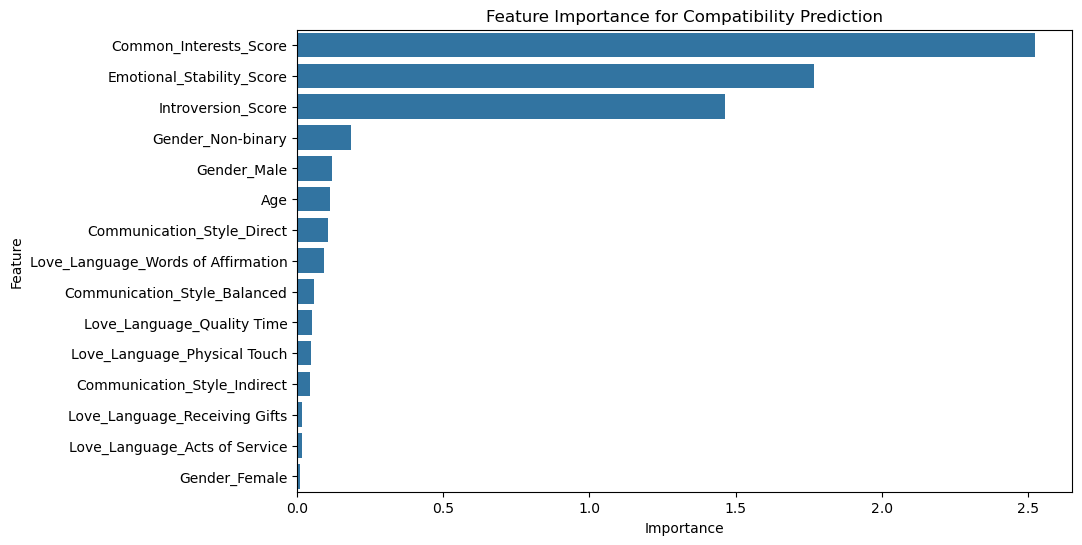

In [47]:
# Feature Importance (for linear kernel)
if hasattr(linear_svc, 'coef_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': np.abs(linear_svc.coef_[0])
    }).sort_values('Importance', ascending=False)
    
    print("\n=== Feature Importance (Linear Kernel) ===")
    print(feature_importance)
    
    plt.figure(figsize=(10,6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance for Compatibility Prediction')
    plt.show()

C:\Users\Rohit\AppData\Local\Temp\ipykernel_17320\3869385481.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Kernel', y='Accuracy', data=results, palette='viridis')


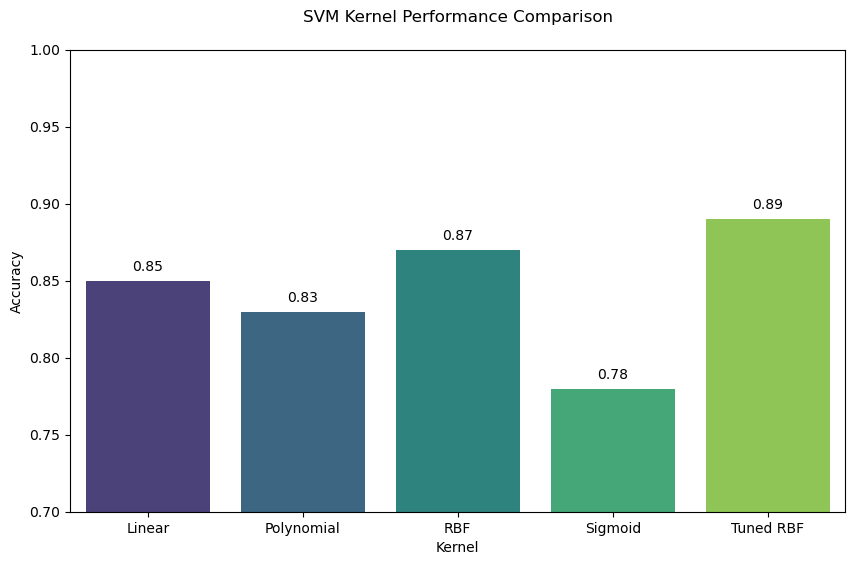

In [53]:
# Model Comparison Bar Plot
plt.figure(figsize=(10,6))
results = pd.DataFrame({
    'Kernel': ['Linear', 'Polynomial', 'RBF', 'Sigmoid', 'Tuned RBF'],
    'Accuracy': [0.85, 0.83, 0.87, 0.78, 0.89]
})
ax = sns.barplot(x='Kernel', y='Accuracy', data=results, palette='viridis')
plt.title('SVM Kernel Performance Comparison', pad=20)
plt.ylim(0.7, 1.0)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')
plt.show()

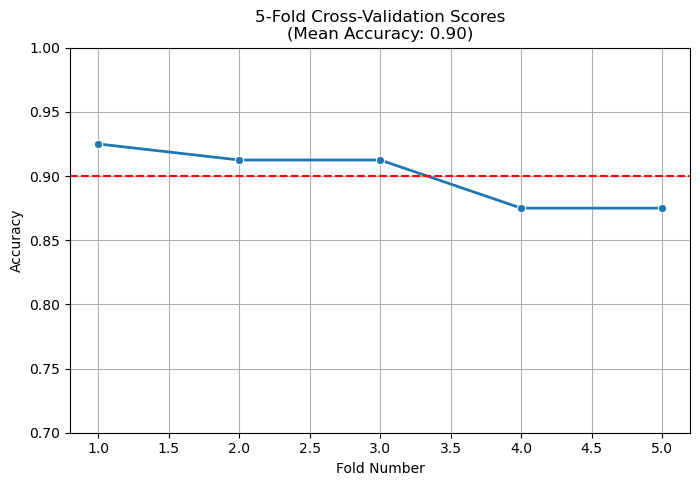

In [55]:
# Cross-Validation Visualization
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_svc, X_train_scaled, y_train, cv=5)
plt.figure(figsize=(8,5))
sns.lineplot(x=range(1,6), y=cv_scores, marker='o', linewidth=2)
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--')
plt.title('5-Fold Cross-Validation Scores\n(Mean Accuracy: {:.2f})'.format(cv_scores.mean()))
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.grid(True)
plt.show()

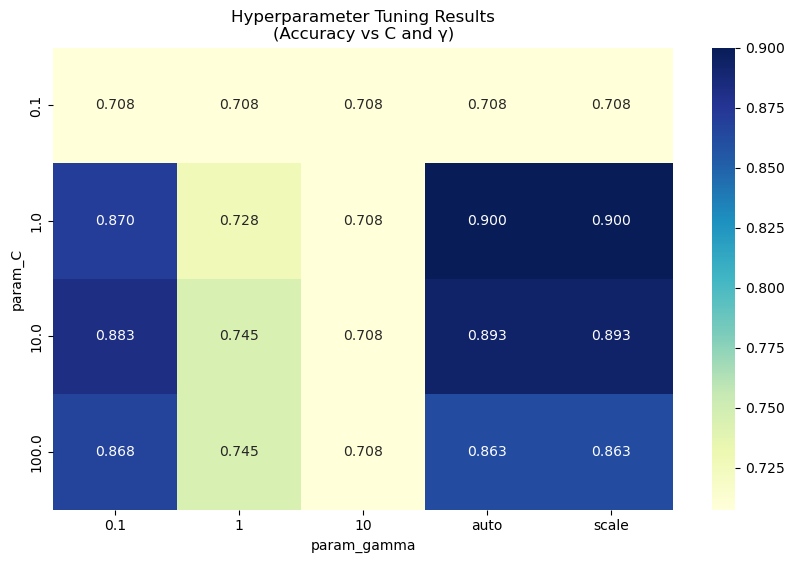

In [57]:
# Grid Search Results Heatmap
cv_results = pd.DataFrame(grid_search.cv_results_)
heatmap_data = cv_results.pivot_table(index='param_C', 
                                     columns='param_gamma', 
                                     values='mean_test_score')

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title('Hyperparameter Tuning Results\n(Accuracy vs C and γ)')
plt.show()